# **Computer Vision**

## 1. Understanding convolutional (conv) layers

### 1.1 Why do we need to understand this?

1. **Model parameters** $\longrightarrow$ How many params will model have if we'll use this conv layer, and what if we'll use 3 conv layers of one type, 10 of second type and 20 of third one? We can theoretically compute and analyze this things without any additional tools
2. **$\Delta H, \Delta W, \Delta C$** $\longrightarrow$ What will happen to the image after going through this conv layer? Especially important when you want to stack **a lot** of them one after another or create atypical architecture
3. **Receptive field** $\longrightarrow$ How to interpret model results and find what went wrong, or how exactly model solved the case? How big of a patterns model can phisically capture?
4. **It's not just magic!** $\longrightarrow$ **It's cooler, it's mathematical magic!!!** And you can calculate and compute it in any way you want

### 1.2 Conv layer params

https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

input: $H \times W \times C_{in}$

1. Kernel\_size $\longrightarrow$ [$K_{h} \times K_{w}$]
2. Input and output channels $\longrightarrow$ [$C_{in}$, $C_{out}$]
3. Padding $\longrightarrow$ how much zeroes (or other specified elements) should be added on each side of the image [$P$, default 0]
4. Stride $\longrightarrow$ distance between two adjacent positions of the kernel on the original image [$S$, default 1]
5. Dilation $\longrightarrow$ distance between each two adjacent elements inside the kernel [$D$, default 1]
6. Bias $\longrightarrow$ linear addition to each output channel [$B$, default True]

output: $H' \times W' \times C_{out}$

<ul>
<title>Convolutional layer:</title>
<img src=https://miro.medium.com/max/535/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif alt="Convolutional layer" width="25%"/>

<title>Padding:</title>
<img src=https://miro.medium.com/max/395/1*1okwhewf5KCtIPaFib4XaA.gif alt="Padding" width="25%"/>
</ul>

<ul>
<title>Stride:</title>
<img src=https://miro.medium.com/max/294/1*BMngs93_rm2_BpJFH2mS0Q.gif alt="Stride" width="25%"/>

<title>Dilation:</title>
<img src=https://miro.medium.com/max/395/0*7LCdr8W3gSQdnlSC.gif alt="Dilation" width="25%"/>
</ul>

### 1.3 Model parameters

Depends on $K_h, K_w, C_{in}, C_{out}, B$

Actual kernel, moving across the image, has size $K_h \times K_w \times C_{in}$. Then, for each output channel we have one **different** kernel of this size and one bias value, if $B = \text{true}$

So, weights, corresponding to one convolutional layers are: $$((K_h * K_w * C_{in}) + B) * C_{out}$$

### 1.4 $\Delta$ sizes

Depends on everything, except bias

Basically kernel of actual width $w'$ will substract $w'-1$ from original image (only $W - w' + 1$ possitions horizontally to put kernel)

What is actual width of the kernel $w'$?  It's $w' = (K_w - 1) * D + 1$, because with dilation we're making kernel bigger, without adding any additional parameters, but instead making kernel sparse

Padding adds $P$ extra elements on both sides of the image. So, if $P \neq 0$ then $W = W + 2 P$

With stride we ignore some of the available positions of the actual kernel to increase computational efficiency $W = \Big\lfloor \frac{W - 1}{S} + 1 \Big\rfloor$

Summarizing everything before: $$W' = \Bigg\lfloor \frac{W + 2 P - D (K_w - 1) - 1}{S} + 1 \Bigg\rfloor$$

Exactly the same applies to $H \rightarrow H'$

$C_{out}$ is set manullay and does not depend on anything else

### 1.5 Receptive field

How much of a pattern model can possibly see? 

If convolutional model has only one layer, then the biggest possible pattern that model can capture is $K_h \times K_w$

If we'll use many small kernels consecutively, the last layer will be able to capture a patterns way bigger then it's kernel size. Receptive field - zone, from which a particular neuron actually takes information

And... that's exactly the reason why we **STACK MORE LAYERS!!!** $\longrightarrow$ it's just cheaper and more effective to have few small kernels, instead of one big

**Simple example**:

<img src=https://www.baeldung.com/wp-content/uploads/sites/4/2021/07/Capture1.png alt="Receptive field" width="30%" height="200"/>

So, how can we calculate it's size ourselves?

For fixated neuron on layer $L$ it's receptive field on this layer equals 1. Then, recursively, each previous layer's receptive field size ($r_{l-1}$) for neuron on layer $L$ depends on kernel size ($k_l$) and stride ($s_{l}$) of conv layer applied after previous layer and this layer's receptive field size ($r_{l}$):
$$r_{L} = 1; \quad r_{l-1} = s_l r_l + (k_l - s_l)$$ 

$$\text{Analytical formula}: \quad r_0 = \sum\limits_{l=1}^{L} \bigg( (k_l - 1) \prod\limits_{i=1}^{l-1} s_i \bigg) + 1$$

### 1.6 Intermediate representations (will be more in part 6)

Sometimes it's very useful to see what model actually is looking for in the image, on which parts or patterns does it activates

It helps with understanding of a model

## 2. Let's have some fun with different data

### 2.1 Downloading data

Downloading different datasets using https://pytorch.org/vision/stable/datasets.html

In [1]:
from torchvision import datasets
import os

download_dir = './datasets'
dataset_name = 'CIFAR10'

download = not os.path.isdir(f'{download_dir}/{dataset_name}')
data = datasets.CIFAR10(root=f'{download_dir}/CIFAR10', download=download)
val_data = datasets.CIFAR10(root=f'{download_dir}/CIFAR10', download=download, train=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./datasets/CIFAR10/cifar-10-python.tar.gz to ./datasets/CIFAR10
Files already downloaded and verified


### 2.2 Let's look on our data

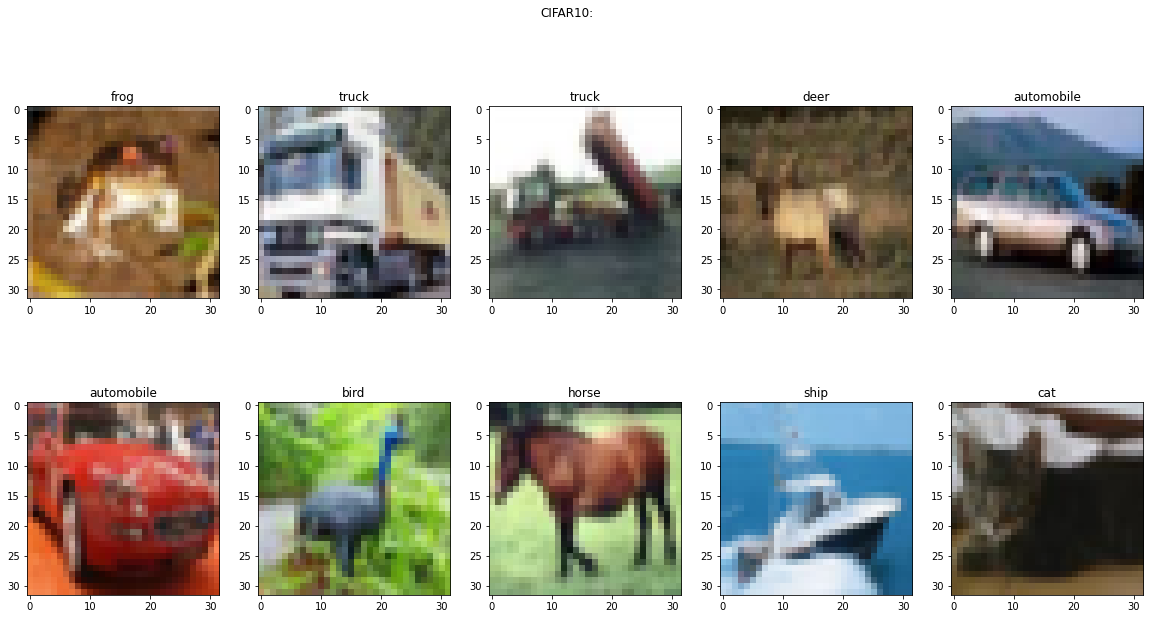

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

h = 2
w = 5
  
fig, _ = plt.subplots(h, w, figsize=(20, 5 * h))
fig.suptitle(f'{dataset_name}:')
for i, el in enumerate(data):
    if i >= h * w:
        break
    img, label = el
    
    plt.subplot(h, w, i + 1)
    plt.imshow(img)
    if isinstance(el[1], int):
        plt.title(data.classes[label])
plt.show()

### 2.3 Making dataloaders

In [3]:
class AddTransformsDataset:
    # Class to add custom transforms to any dataset before creating dataloader
    def __init__(self, dataset, transforms=None):
        self.dataset = dataset
        self.transforms = transforms

        self.clss = self.dataset.classes
    
    def __len__(self) -> int:
        return self.dataset.__len__()
    
    def classes(self):
        return self.clss
    
    def __getitem__(self, index: int):
        image, label = self.dataset.__getitem__(index)
        if self.transforms is not None:
            image = self.transforms(image)
        return image, label

In [4]:
from torchvision import transforms as tr
from torch.utils.data import DataLoader

def my_transform():
    return tr.Compose([
        tr.ToTensor(),
        tr.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])


def make_dataloader(data, batch_size=16, transform_func=None, val=False):
    ds = AddTransformsDataset(data, transform_func())
    dataloader = DataLoader(
        ds,
        batch_size=batch_size,
        shuffle=(not val),
        drop_last=(not val)
    )
    return dataloader, ds.classes()

In [5]:
dataloader, classes = make_dataloader(data, 16, my_transform)
val_dataloader, _ = make_dataloader(val_data, 16, my_transform, val=True)

In [6]:
imgs_batch, lbls_batch = next(iter(dataloader))
print(f'shapes for {dataset_name}:\n--images_batch: {imgs_batch.shape},\n--labels_batch: {lbls_batch.shape}\n')

shapes for CIFAR10:
--images_batch: torch.Size([16, 3, 32, 32]),
--labels_batch: torch.Size([16])



## 3. Building our first model and learning pipeline

### 3.1 Linear model (no conv layers)

In [7]:
import numpy as np
from torch import nn
from collections import OrderedDict

class simple_net(nn.Module):
    def __init__(self, input_size, num_layers, hidden_sizes, activations, dropouts, output_size):
        super().__init__()
        
        assert len(hidden_sizes) == num_layers, f'provide {num_layers} hidden_sizes'
        assert len(activations) == num_layers, f'provide {num_layers} activation functions'
        assert len(dropouts) == num_layers, f'provide {num_layers} dropout values or just one for all layers'
        
        hid = []
        for i in range(num_layers-1):
            hid.extend([
                (f'act_{i+1}', activations[i]),
                (f'drop_{i+1}', nn.Dropout(dropouts[i])),
                (f'hid_{i+1}', nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            ])
        
        head = [
            (f'act_{num_layers}', activations[-1]),
            (f'drop_{num_layers}', nn.Dropout(dropouts[-1])),
            ('hid2out', nn.Linear(hidden_sizes[-1], output_size)),
            ('log-softmax', nn.LogSoftmax(dim=-1))
        ]
         
        flat = ('flat', nn.Flatten())
        in_to_hid = ('in2hid', nn.Linear(input_size, hidden_sizes[0]))
        
        self.net = [flat, in_to_hid, *hid, *head]
        self.net = nn.Sequential(OrderedDict(self.net))
    
    def forward(self, imgs):
        return self.net(imgs)

In [8]:
model_params = {
    'input_size': 3*32*32,
    'num_layers': 3,
    'hidden_sizes': [100, 100, 30],
    'activations': [nn.Tanh(), nn.LeakyReLU(0.2), nn.ReLU()],
    'dropouts': [0.2, 0.2, 0.2],
    'output_size': 10
}

model_lin = simple_net(**model_params)

print('Model:', model_lin, sep='\n')

imgs_batch, lbls_batch = next(iter(dataloader))

print(f'\nInput shape: {imgs_batch.shape}')
out = model_lin(imgs_batch)
print(f'Output shape: {out.shape}')

Model:
simple_net(
  (net): Sequential(
    (flat): Flatten(start_dim=1, end_dim=-1)
    (in2hid): Linear(in_features=3072, out_features=100, bias=True)
    (act_1): Tanh()
    (drop_1): Dropout(p=0.2, inplace=False)
    (hid_1): Linear(in_features=100, out_features=100, bias=True)
    (act_2): LeakyReLU(negative_slope=0.2)
    (drop_2): Dropout(p=0.2, inplace=False)
    (hid_2): Linear(in_features=100, out_features=30, bias=True)
    (act_3): ReLU()
    (drop_3): Dropout(p=0.2, inplace=False)
    (hid2out): Linear(in_features=30, out_features=10, bias=True)
    (log-softmax): LogSoftmax(dim=-1)
  )
)

Input shape: torch.Size([16, 3, 32, 32])
Output shape: torch.Size([16, 10])


In [9]:
# Counting how many parameters does our model have
def model_num_params(model):
    sum_params = 0
    for param in model.named_parameters():
        num_params = np.prod(param[1].shape)
        print('{: <19} ~  {: <7} params'.format(param[0], num_params))
        sum_params += num_params
    print(f'\nIn total: {sum_params} params')
    return sum_params

sum_params = model_num_params(model_lin)

net.in2hid.weight   ~  307200  params
net.in2hid.bias     ~  100     params
net.hid_1.weight    ~  10000   params
net.hid_1.bias      ~  100     params
net.hid_2.weight    ~  3000    params
net.hid_2.bias      ~  30      params
net.hid2out.weight  ~  300     params
net.hid2out.bias    ~  10      params

In total: 320740 params


### 3.2 Optimizer

In [10]:
import torch

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

def create_model_and_optimizer(model_class, model_params, lr=1e-3, device=device):
    model = model_class(**model_params)
    model = model.to(device)
    
    optimizer = torch.optim.Adam(model.parameters(), lr)
    return model, optimizer

print(device)

cuda:0


### 3.3 Train/val one epoch

In [11]:
import torch.nn.functional as F
from tqdm.notebook import tqdm

def train(model, optimizer, loader, criterion):
    model.train()
    losses_tr = []
    for images, targets in tqdm(loader):
        images = images.to(device)
        targets = targets.to(device)
        
        optimizer.zero_grad()
        out = model(images)
        loss = criterion(out, targets)
        
        loss.backward()
        optimizer.step()
        losses_tr.append(loss.item()) 
    
    return model, optimizer, np.mean(losses_tr)

def val(model, loader, criterion):
    model.eval()
    losses_val = []
    with torch.no_grad():
        for images, targets in tqdm(loader):
            images = images.to(device)
            targets = targets.to(device)
            out = model(images)
            loss = criterion(out, targets)

            losses_val.append(loss.item())
    
    return np.mean(losses_val)

### 3.4 Learning loop

In [12]:
from IPython.display import clear_output
from tqdm.notebook import trange


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    

def learning_loop(model, optimizer, train_loader, val_loader, criterion, scheduler=None, 
                  min_lr=None, epochs=10, val_every=1, draw_every=1, separate_show=False):
    
    losses = {'train': [], 'val': []}
    for epoch in range(1, epochs+1):
        print(f'#{epoch}/{epochs}:')
        model, optimizer, loss = train(model, optimizer, train_loader, criterion)
        losses['train'].append(loss)

        if not (epoch % val_every):
            loss = val(model, val_loader, criterion)
            losses['val'].append(loss)
            if scheduler:
                scheduler.step(loss)

        if not (epoch % draw_every):
            clear_output(True)
            fig, ax = plt.subplots(1, 2 if separate_show else 1, figsize=(20, 10))
            fig.suptitle(f'#{epoch}/{epochs}:')

            if separate_show:
                plt.subplot(121)
                plt.title('loss on train')
            plt.plot(losses['train'], 'r.-', label='train')
            plt.legend()

            if separate_show:
                plt.subplot(122)
                plt.title('loss on validation')
            else:
                plt.title('losses')
            plt.plot(losses['val'], 'g.-', label='val')
            plt.legend()
            
            plt.show()
        
        if min_lr and get_lr(optimizer) <= min_lr:
            print(f'Learning process ended with early stop after epoch {epoch}')
            break
    
    return model, optimizer, losses

### 3.5 Training linear model

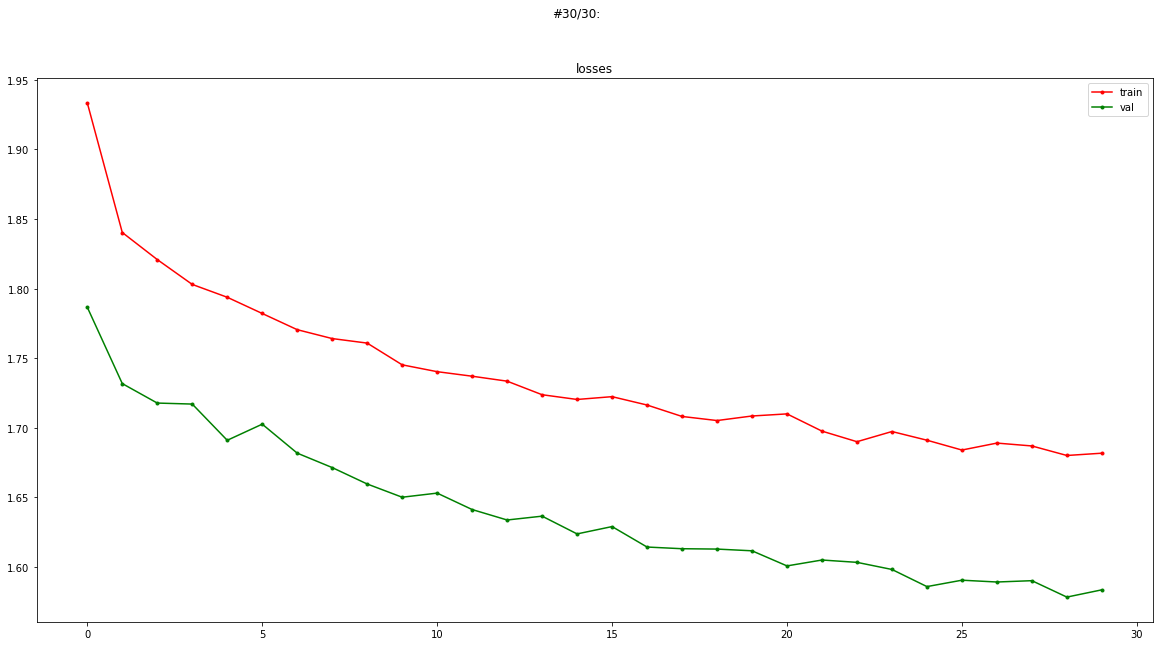

CPU times: user 13min 2s, sys: 16.9 s, total: 13min 19s
Wall time: 13min 37s


In [13]:
%%time

model, optimizer = create_model_and_optimizer(
    model_class=simple_net, 
    model_params=model_params,
    lr=1e-3
)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.25, patience=4, threshold=0.001, verbose=True)
criterion = nn.NLLLoss()

model, optimizer, losses = learning_loop(
    model=model,
    optimizer=optimizer,
    train_loader=dataloader,
    val_loader=val_dataloader,
    criterion=criterion,
    scheduler=scheduler,
    epochs=30,
    min_lr=2e-6
)

### 3.6 Looking at the results

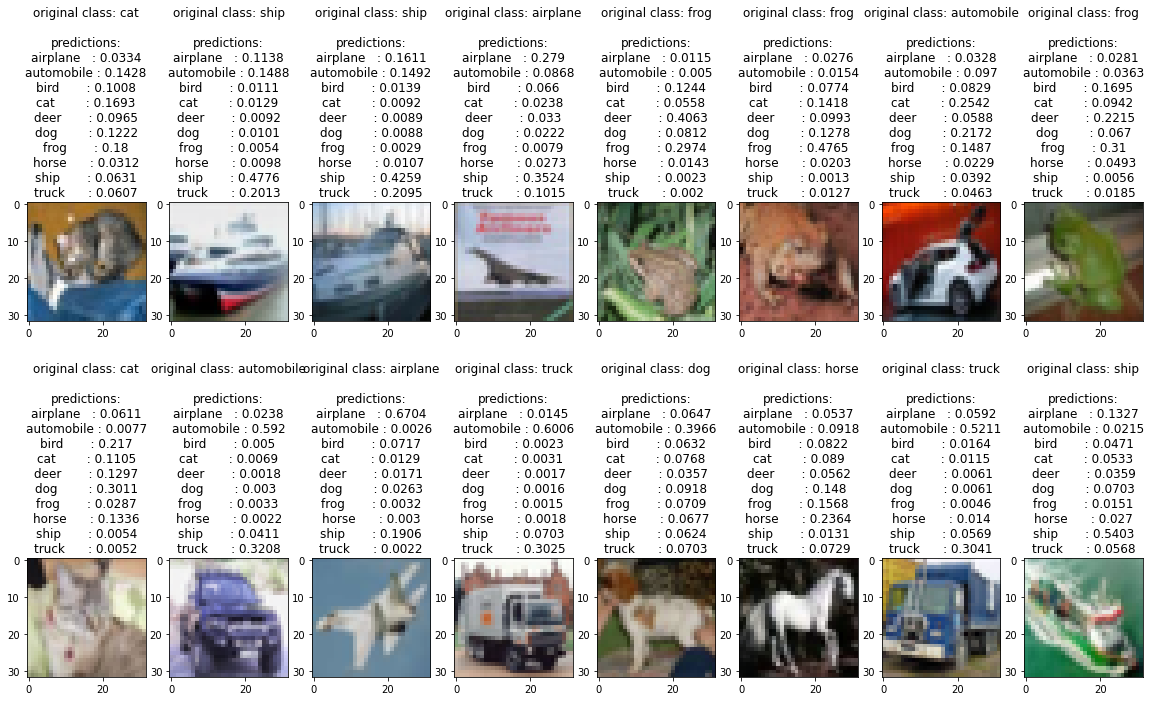

In [14]:
def renormalize(img):
    m = np.array([0.485, 0.456, 0.406])#.reshape(1, 3, 1, 1)
    s = np.array([0.229, 0.224, 0.225])#.reshape(1, 3, 1, 1)
    return np.clip(img * s + m, 0, 1)

def show_results(model, val_loader, class_labels):
    with torch.no_grad():
        imgs_batch, lbls_batch = next(iter(val_loader))
        preds = model(imgs_batch.to(device)).exp()

        plt.subplots(2, 8, figsize=(20, 12))
        for i in range(imgs_batch.shape[0]):
            plt.subplot(2, 8, i+1)
            img = imgs_batch[i].numpy().transpose(1, 2, 0)
            img = renormalize(img)
            plt.imshow(img)
            title = f'original class: {class_labels[lbls_batch[i]]}\n\npredictions:'
            for j, pred in enumerate(preds[i,:]):
                title += '\n{: <10} : {}'.format(class_labels[j], round(preds[i,j].item(), 4))
            plt.title(title)
        plt.show()

show_results(model, val_dataloader, classes)

  0%|          | 0/625 [00:00<?, ?it/s]

TypeError: ignored

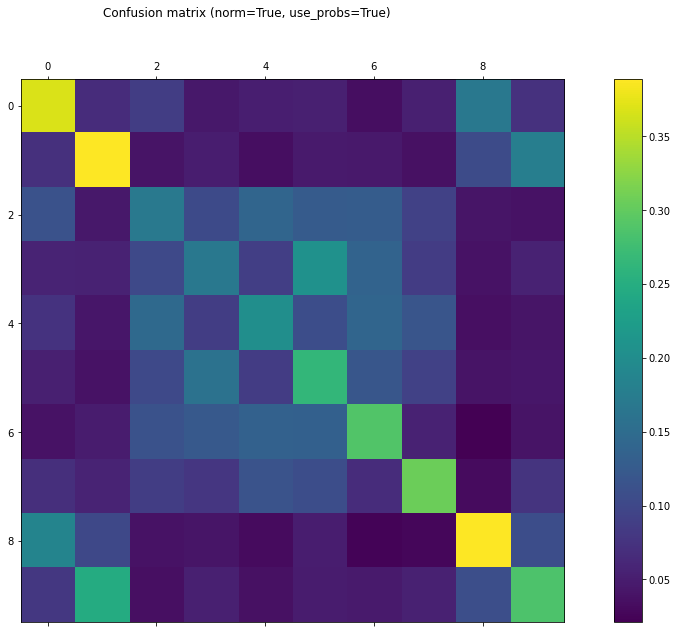

In [15]:
def real_confusion_matrix(model, val_loader, class_labels, use_probs=False, normalize=True):
    with torch.no_grad():
        n_classes = len(class_labels)
        conf_matrix = np.zeros((n_classes, n_classes))
        for i, (images, labels) in enumerate(tqdm(val_loader)):
            probs = model(images.to(device)).exp()
            if use_probs:
                for j in range(images.shape[0]):
                    for c in range(n_classes):
                        conf_matrix[labels[j].item(), c] += probs[j,c]
            else:
                _, pred_classes = torch.max(probs, 1)
                for j in range(images.shape[0]):
                    conf_matrix[labels[j].item(), pred_classes[j].item()] += 1.
        
        if normalize:
            conf_matrix /= conf_matrix.sum(1)
        
        fig = plt.figure(figsize=(18, 10))
        fig.suptitle(f'Confusion matrix (norm={normalize}, use_probs={use_probs})')
        ax = fig.add_subplot(111)
        cax = ax.matshow(conf_matrix)
        fig.colorbar(cax)
        
        ax.xaxis.set_major_formatter('')
        secax = ax.secondary_xaxis('top')
        secax.xaxis.set_ticks(list(range(len(class_labels))))
        secax.xaxis.set_ticklabels(class_labels)
        secax.set_xlabel('predicted class')
        
        ax.yaxis.set_ticks(list(range(len(class_labels))))
        ax.yaxis.set_ticklabels(class_labels)
        ax.set_ylabel('true class')
        
        plt.show()
        
        return conf_matrix

pcm = real_confusion_matrix(model, val_dataloader, classes, use_probs=True, normalize=True)

## 5. Trying convolutions

### 5.1 Model

In [16]:
import numpy as np
from torch import nn
from collections import OrderedDict

class conv_net(nn.Module):
    """
        Simple convolutional network
    """
    def __init__(self, input_size, num_layers, kernel_sizes, hidden_sizes, activations, dropouts, output_size):
        super(conv_net, self).__init__()
        
        if not isinstance(kernel_sizes, list):
            kernel_sizes = [kernel_sizes] * num_layers
        assert len(kernel_sizes) == num_layers, f'provide {num_layers} kernel_sizes or just one for all layers'
        
        if not isinstance(hidden_sizes, list):
            hidden_sizes = [hidden_sizes] * num_layers
        assert len(hidden_sizes) == num_layers, f'provide {num_layers} hidden_sizes or just one for all layers'
        
        if not isinstance(activations, list):
            activations = [activations] * num_layers
        assert len(activations) == num_layers, f'provide {num_layers} activation functions or just one for all layers'
        
        if not isinstance(dropouts, list):
            dropouts = [dropouts] * num_layers
        assert len(dropouts) == num_layers, f'provide {num_layers} dropout values or just one for all layers'
        
        in_conv = ('conv_0', nn.Conv2d(input_size[0], hidden_sizes[0], kernel_sizes[0], padding=(kernel_sizes[0]-1)//2))
        
        conv_blocks_ = [[
            (f'act_{i+1}', activations[i]),
            (f'drop_{i+1}', nn.Dropout(dropouts[i])),
            (f'conv_{i+1}', nn.Conv2d(hidden_sizes[i], hidden_sizes[i+1], kernel_sizes[i+1], padding=(kernel_sizes[i+1]-1)//2))
        ] for i in range(num_layers-1)]
        conv_blocks = []
        for el in conv_blocks_:
            conv_blocks.extend(el)
        
        head = [
            (f'act_{num_layers}', activations[-1]),
            (f'drop_{num_layers}', nn.Dropout(dropouts[-1])),
            ('flat', nn.Flatten()),
            ('hid2out', nn.Linear(input_size[1] * input_size[2] * hidden_sizes[-1], output_size)),
            ('log-softmax', nn.LogSoftmax(dim=-1))
        ]
        
        self.net = [in_conv, *conv_blocks, *head]
        self.net = nn.Sequential(OrderedDict(self.net))
    
    def forward(self, imgs):
        return self.net(imgs)

In [17]:
model_params = {
    'input_size': imgs_batch.shape[1:],
    'num_layers': 3,
    'kernel_sizes': 5,
    'hidden_sizes': [16, 16, 8],
    'activations': nn.Tanh(),
    'dropouts': 0.2,
    'output_size': 10
}

model = conv_net(**model_params)

print('Model:', model, sep='\n')

imgs_batch, lbls_batch = next(iter(dataloader))

print(f'\nInput shape: {imgs_batch.shape}')
out = model(imgs_batch)
print(f'Output shape: {out.shape}')

Model:
conv_net(
  (net): Sequential(
    (conv_0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (act_1): Tanh()
    (drop_1): Dropout(p=0.2, inplace=False)
    (conv_1): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (act_2): Tanh()
    (drop_2): Dropout(p=0.2, inplace=False)
    (conv_2): Conv2d(16, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (act_3): Tanh()
    (drop_3): Dropout(p=0.2, inplace=False)
    (flat): Flatten(start_dim=1, end_dim=-1)
    (hid2out): Linear(in_features=8192, out_features=10, bias=True)
    (log-softmax): LogSoftmax(dim=-1)
  )
)

Input shape: torch.Size([16, 3, 32, 32])
Output shape: torch.Size([16, 10])


In [18]:
# Counting how many parameters does our model have
sum_params = model_num_params(model)

net.conv_0.weight   ~  1200    params
net.conv_0.bias     ~  16      params
net.conv_1.weight   ~  6400    params
net.conv_1.bias     ~  16      params
net.conv_2.weight   ~  3200    params
net.conv_2.bias     ~  8       params
net.hid2out.weight  ~  81920   params
net.hid2out.bias    ~  10      params

In total: 92770 params


### 5.2 Learning loop

In [ ]:
%%time

model, optimizer = create_model_and_optimizer(
    conv_net,
    model_params,
    7*1e-4
)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.25, patience=4, threshold=0.001, verbose=True)

criterion = nn.NLLLoss()

model, optimizer, losses = learning_loop(
    model=model,
    optimizer=optimizer,
    train_loader=dataloader,
    val_loader=val_dataloader,
    criterion=criterion,
    scheduler=scheduler,
    epochs=30,
    min_lr=1e-5
)

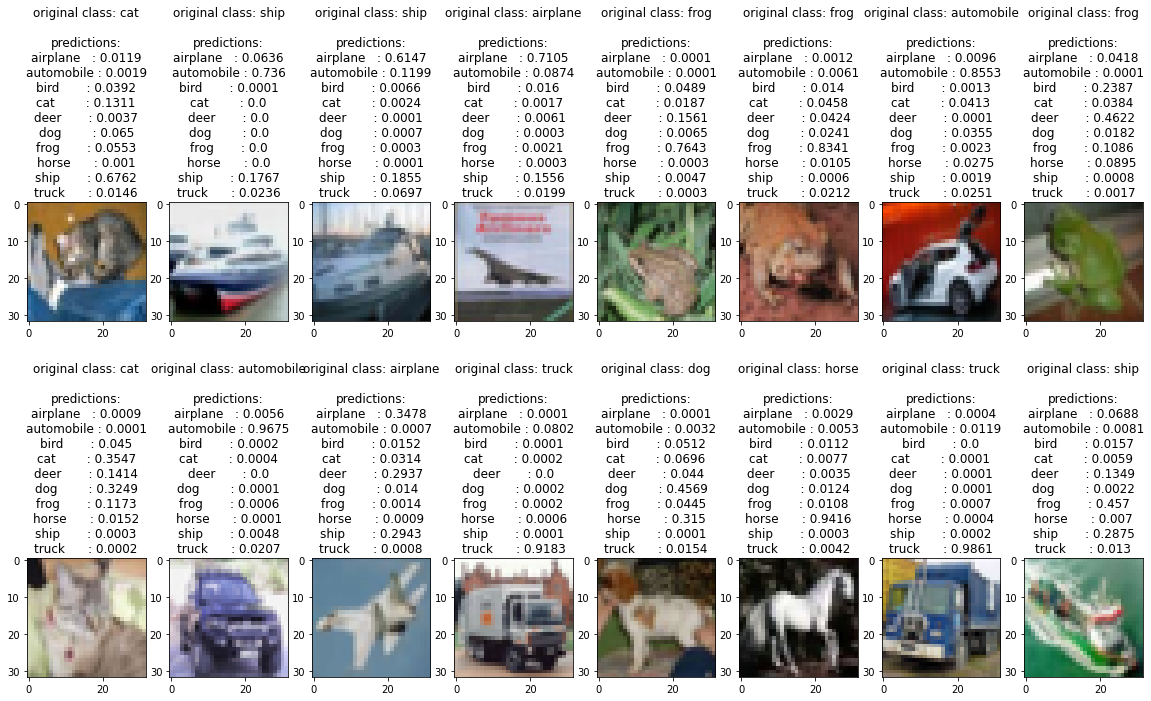

In [ ]:
show_results(model, val_dataloader, classes)

  0%|          | 0/625 [00:00<?, ?it/s]

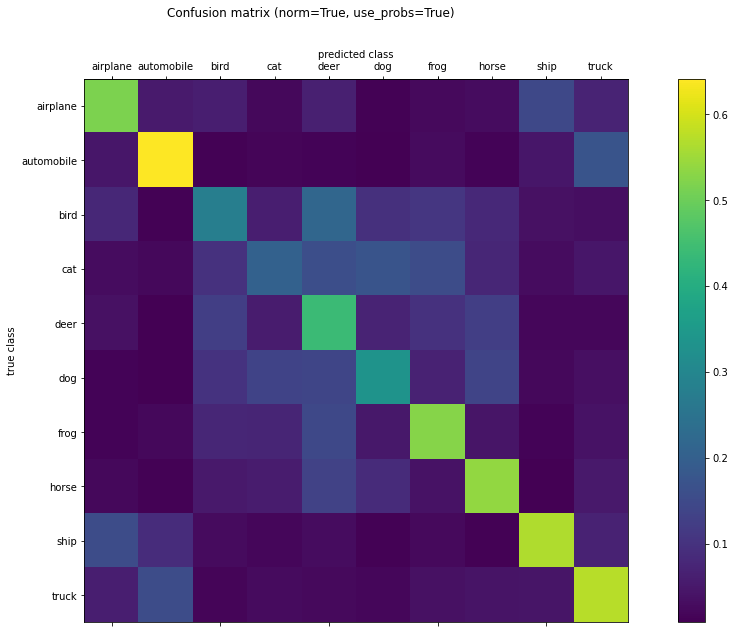

In [ ]:
pcm = real_confusion_matrix(model, val_dataloader, classes, use_probs=True, normalize=True)

## 6. Analyzing results

Few good links

https://distill.pub/2017/feature-visualization $\longrightarrow$ feature visualization

https://yosinski.com/deepvis $\longrightarrow$ deep visualisation toolbox

## 7. What else can we do to improve convolutional model's quality?

### 7.1 Image preprocessing

Data preprocessings and augumentations are very important

Always think about how this exact transformation will affect input image and would this help or not

https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py $\longrightarrow$ examples

https://pytorch.org/vision/stable/transforms.html $\longrightarrow$ pytorch transforms documentation

- **Normalization** $\longrightarrow$ extremely important in terms of learning stability
- **Resize** $\longrightarrow$ can be used in a lot of various ways, but most oftenly used to make all the
- **Crops**
- **Flips**
- **Blur**
- **Turn**
- **Grayscale**
- **Brightness/colors/...**

### 7.2 Special tricks

- **Residual connections** $\longrightarrow$ especially important for deep NN, helps avoiding vanishing gradient
- **Layer normalization** $\longrightarrow$ helps avoiding exploding or vanishing gradients, makes learning more stable
- **Max/average poolings** $\longrightarrow$ computationally cheap and easy way of reducing dimensionality of current image, while preserving data. Also is non-linear layer, works really well (emperically) with ReLU activations
- **Global poolings** $\longrightarrow$ can be used instead of flatten + linear head, in terms of convNN is's bettter, because logically it's more important if we found the pattern or not, instead of is's final position. Second important advantage of global pooling - input images can be not of the same size. Also all benefits of poolings are still applied here
- **Adding random noise to the image** $\longrightarrow$ regularization technique

### Задание 1 (2 балла)
Создайте свою свёрточную нейросеть (использование пулингов обязательно!) и обучите её на тех же данных (CIFAR 10). Добавьте в даталоадер хотя бы одну из описанных выше аугментаций. Опишите полученные результаты. Если все сделать правильно, качество должно улучшиться.

In [149]:
class task1_conv_net(nn.Module):
    """
        Simple convolutional network
    """
    def __init__(self):
        super(task1_conv_net, self).__init__()

        self.net = nn.Sequential(OrderedDict(
            {
                'conv_0': nn.Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
                'act_1': nn.Tanh(),
                'mxpl_1': nn.MaxPool2d(kernel_size=(3, 3), stride=(1, 1), padding=(2, 2)),
                'drop_1': nn.Dropout(p=0.2, inplace=False),
                'conv_1': nn.Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
                'act_2': nn.Tanh(),
                'mxpl_2': nn.MaxPool2d(kernel_size=(2, 2), stride=(1, 1), padding=(2, 2)),
                'drop_2': nn.Dropout(p=0.2, inplace=False),
                'conv_2': nn.Conv2d(16, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
                'act_3': nn.Tanh(),
                #'mxpl_3': nn.MaxPool2d(kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
                'drop_3': nn.Dropout(p=0.2, inplace=False),
                'flat': nn.Flatten(start_dim=1, end_dim=-1),
                'hid2out': nn.Linear(in_features=8192, out_features=10, bias=True),
                'log-softmax': nn.LogSoftmax(dim=-1),
            }
        ))
    
    def forward(self, imgs):
        return self.net(imgs)

In [154]:
def task1_my_transform():
    return tr.Compose([
        tr.ToTensor(),
        tr.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        tr.Grayscale(1),
        # tr.RandomRotation(degrees=(0, 180)),
    ])

In [155]:
dataloader, classes = make_dataloader(data, 16, task1_my_transform)
val_dataloader, _ = make_dataloader(val_data, 16, task1_my_transform, val=True)

In [156]:
model, optimizer = create_model_and_optimizer(
    task1_conv_net,
    {},
    7*1e-4
)
model

task1_conv_net(
  (net): Sequential(
    (conv_0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (act_1): Tanh()
    (mxpl_1): MaxPool2d(kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), dilation=1, ceil_mode=False)
    (drop_1): Dropout(p=0.2, inplace=False)
    (conv_1): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (act_2): Tanh()
    (mxpl_2): MaxPool2d(kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), dilation=1, ceil_mode=False)
    (drop_2): Dropout(p=0.2, inplace=False)
    (conv_2): Conv2d(16, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (act_3): Tanh()
    (mxpl_3): MaxPool2d(kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), dilation=1, ceil_mode=False)
    (drop_3): Dropout(p=0.2, inplace=False)
    (flat): Flatten(start_dim=1, end_dim=-1)
    (hid2out): Linear(in_features=8192, out_features=10, bias=True)
    (log-softmax): LogSoftmax(dim=-1)
  )
)

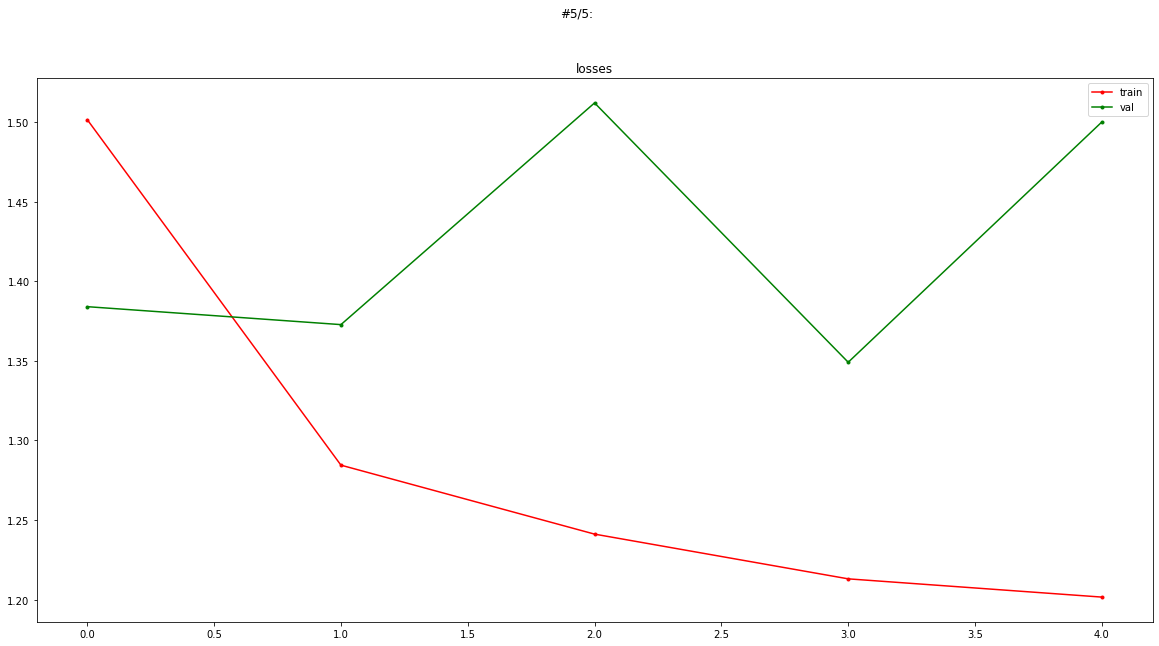

CPU times: user 5min 37s, sys: 4.6 s, total: 5min 42s
Wall time: 5min 49s


In [158]:
%%time

model, optimizer = create_model_and_optimizer(
    task1_conv_net,
    model_params,
    7*1e-4
)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.25, patience=4, threshold=0.001, verbose=True)

criterion = nn.NLLLoss()

model, optimizer, losses = learning_loop(
    model=model,
    optimizer=optimizer,
    train_loader=dataloader,
    val_loader=val_dataloader,
    criterion=criterion,
    scheduler=scheduler,
    epochs=5,
    min_lr=1e-5
)

  0%|          | 0/625 [00:00<?, ?it/s]

TypeError: ignored

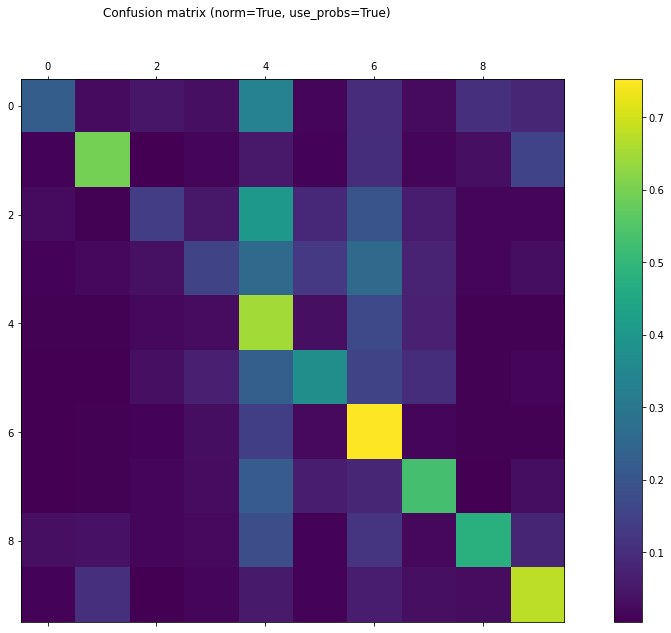

In [159]:
pcm = real_confusion_matrix(model, val_dataloader, classes, use_probs=True, normalize=True)

### 7.3 Finetuning & Transfer learning

We can take some big and already trained model (e.g. resnet) and finetune it

**Finetuning** $\longrightarrow$ initializing model from model already trained on simmiliar task with (may be) additional head at the end, then training this model with lower learning rate on our data

Or we can use transfer learning

**Transfer learning** $\longrightarrow$ removing head, freezing most of the parameters (may be except a few last layers) and changing the head to our needs. Then training this model (but in fact just the new head) on our data

### Задание 2 (2 балла)
Сделайте Transfer learning (создайте новую голову и обучайте только её) на тех же данных (CIFAR 10). Обучать до тех пор, пока loss не перестанет уменьшаться пару эпох. Опишите полученные результаты

In [ ]:
from torchvision import models

ft_model = models.resnet18(pretrained=True, progress=True)

ft_model

In [167]:
num_classes = 10
input_features = ft_model.fc.in_features
ft_model.fc = nn.Linear(input_features, num_classes)

ft_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [161]:
def task2_my_transform():
    return tr.Compose([
        tr.ToTensor(),
        tr.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        tr.Grayscale(3),
        # tr.RandomRotation(degrees=(0, 180)),
    ])

In [165]:
dataloader, classes = make_dataloader(data, 16, task2_my_transform)
val_dataloader, _ = make_dataloader(val_data, 16, task2_my_transform, val=True)

In [166]:
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.25, patience=4, threshold=0.001, verbose=True)

criterion = nn.NLLLoss()

ft_model, optimizer, losses = learning_loop(
    model=ft_model,
    optimizer=optimizer,
    train_loader=dataloader,
    val_loader=val_dataloader,
    criterion=criterion,
    scheduler=scheduler,
    epochs=1,
    min_lr=1e-5,
)

#1/1:


  0%|          | 0/3125 [00:00<?, ?it/s]

RuntimeError: ignored

*Вроде должно работать примерно так, но не успел до конца разобраться :(*